In [2]:
import numpy as np
import pandas as pd
import gudhi
import matplotlib.pyplot as plt
from pprint import pprint as print
import os

/home/bole/.local/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:323: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, axes = plt.subplots(1, 1)


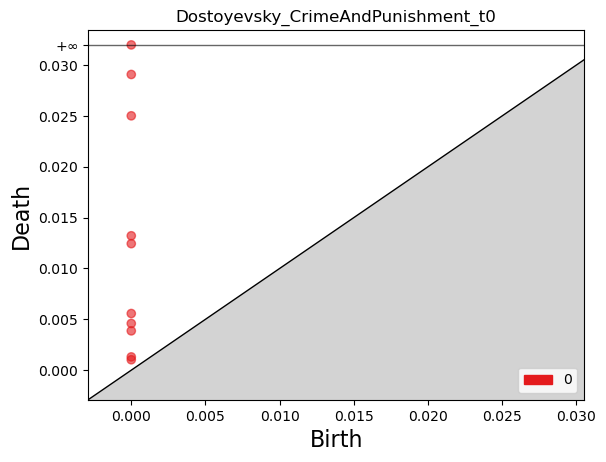

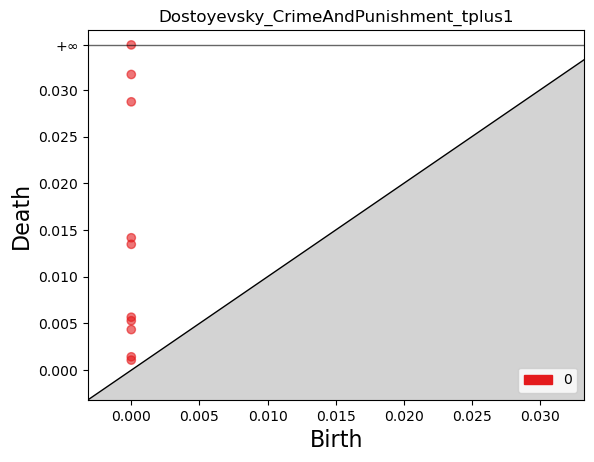

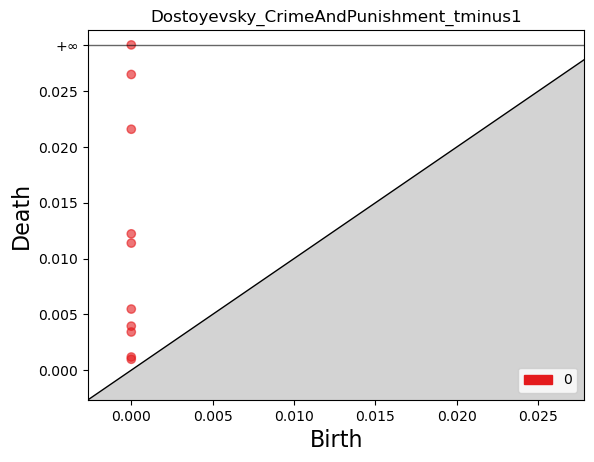

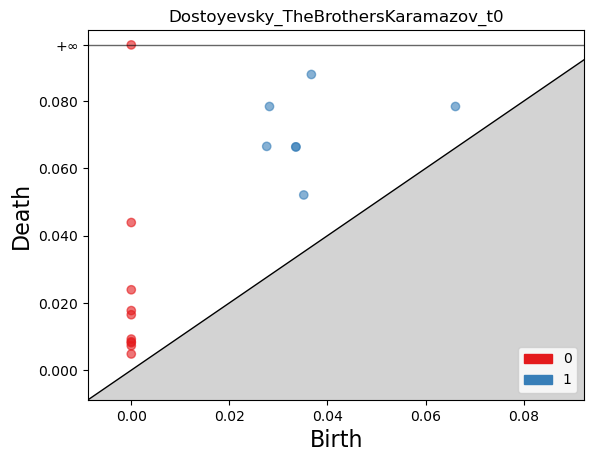

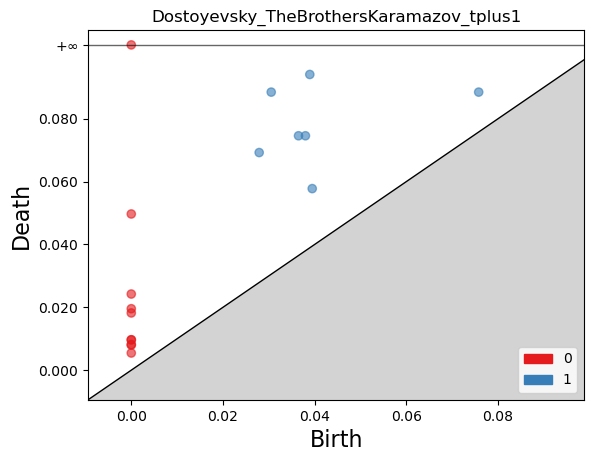

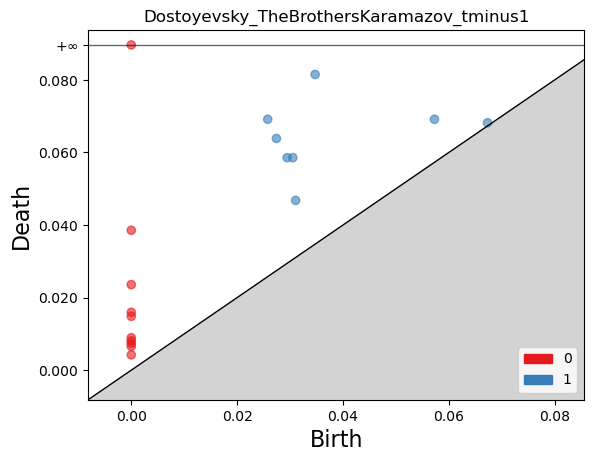

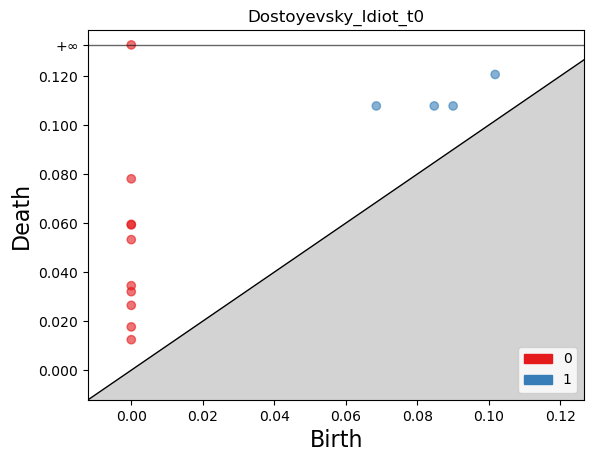

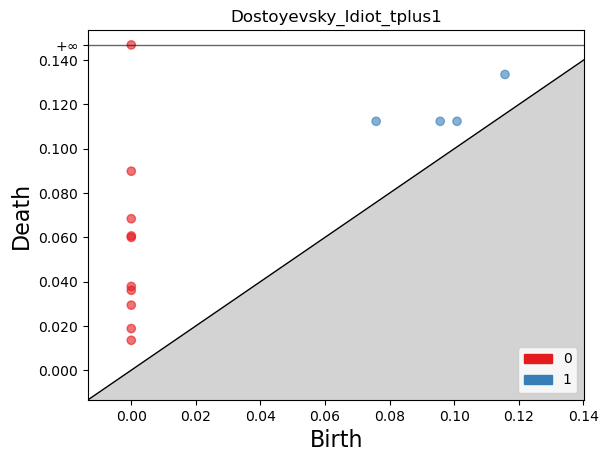

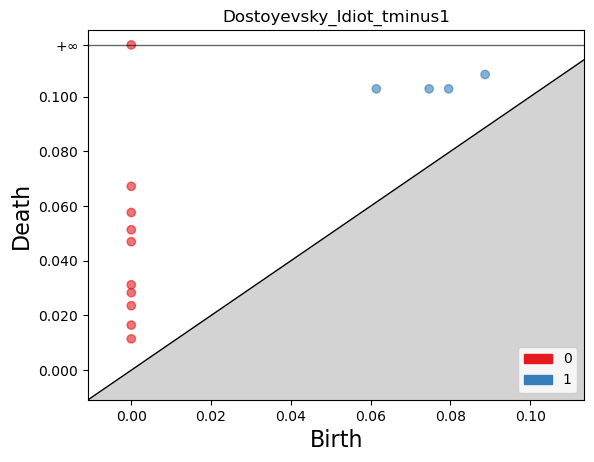

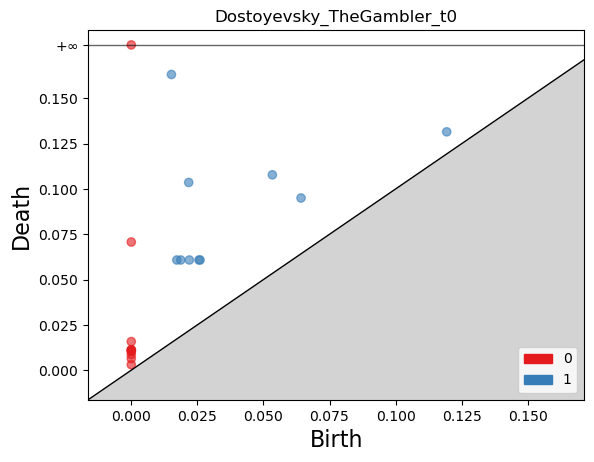

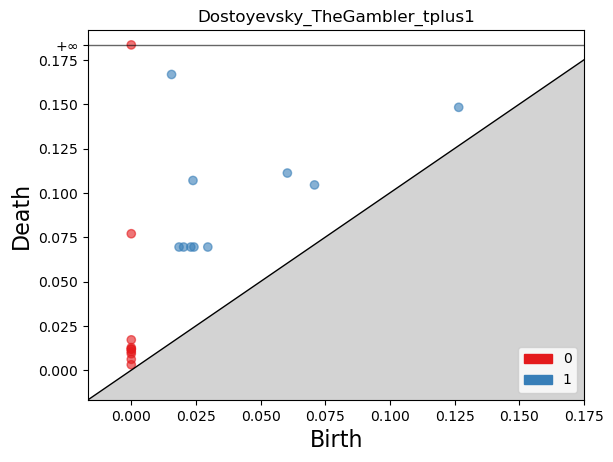

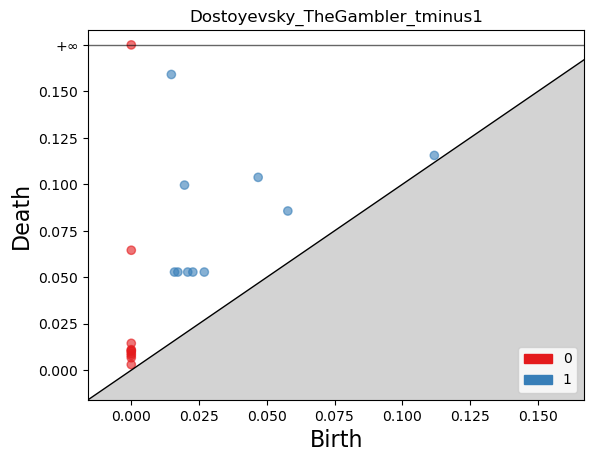

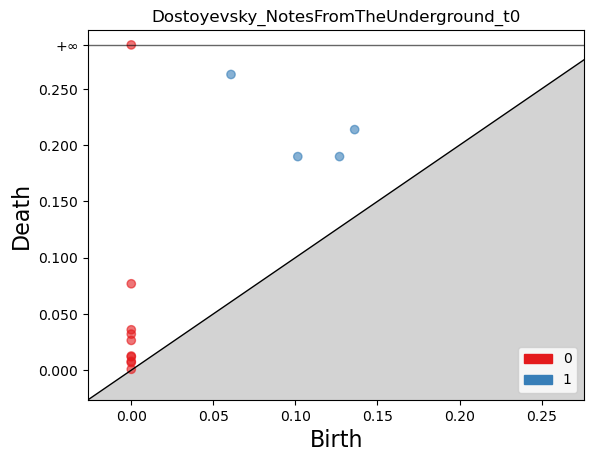

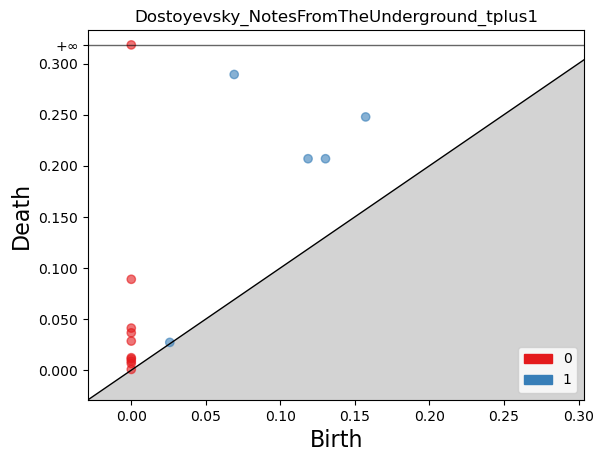

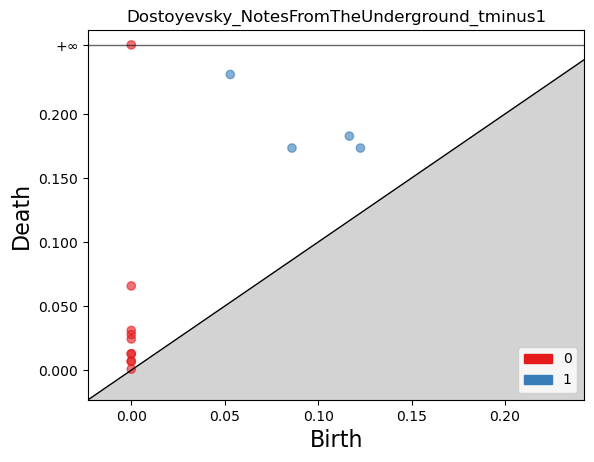

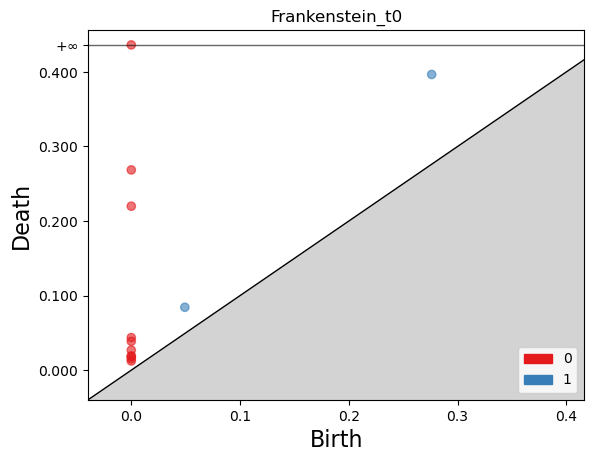

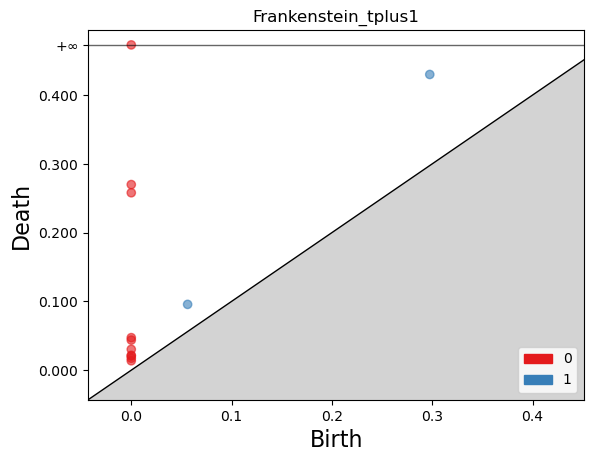

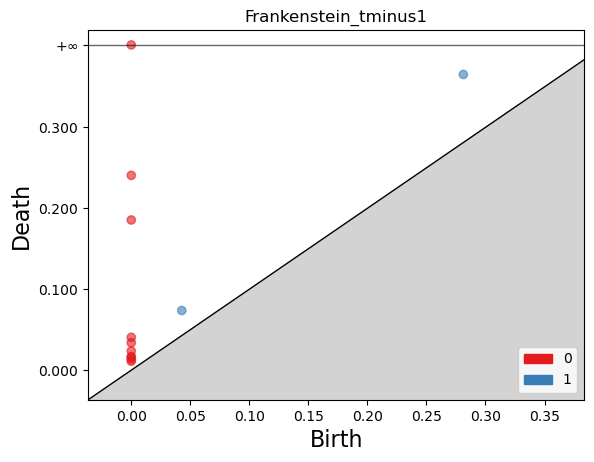

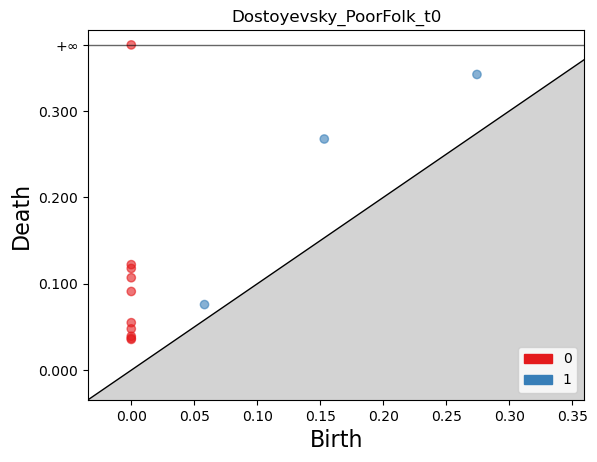

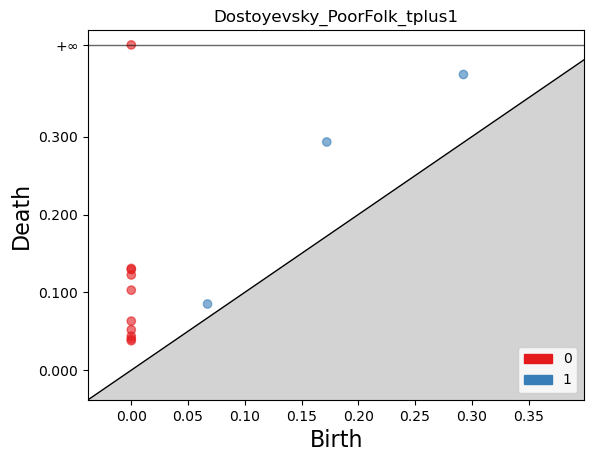

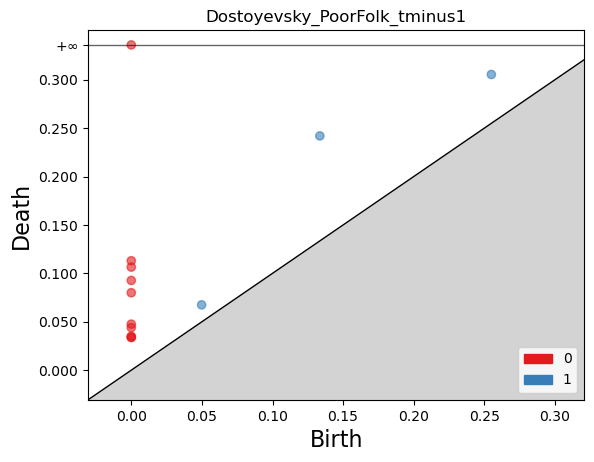

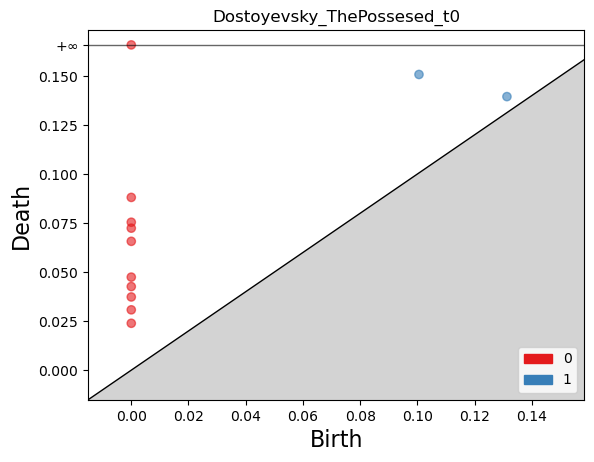

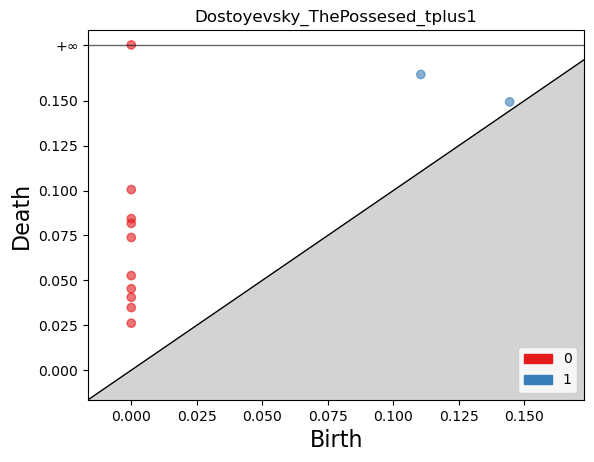

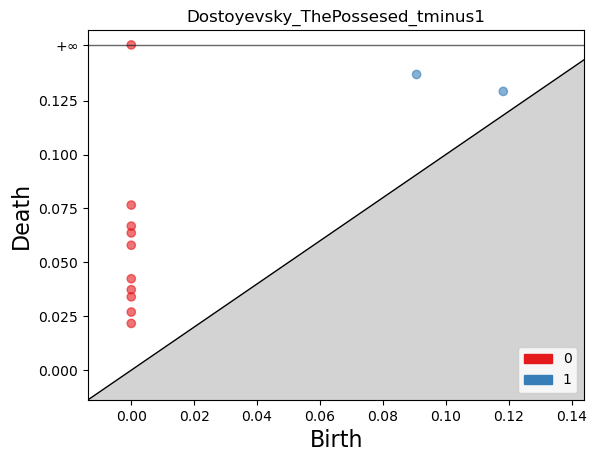

In [12]:
folder_path = './books/'

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        #remove .txt
        book = filename[:-4]
        
        data_t0 = pd.read_csv('distances/' + f'{book}_t0.csv')
        data_t0 = np.array(data_t0)

        data_t1 = pd.read_csv('distances/' + f'{book}_tplus1.csv')
        data_t1 = np.array(data_t1)

        data_tminus1 = pd.read_csv('distances/' + f'{book}_tminus1.csv')
        data_tminus1 = np.array(data_tminus1)

        #drop the first row with character names
        data_t0 = data_t0[:, 1:]
        data_t1 = data_t1[:, 1:]
        data_tminus1 = data_tminus1[:, 1:]

        rips_complex = gudhi.RipsComplex(distance_matrix = data_t0)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        diag = simplex_tree.persistence()
        ax_t0 = gudhi.plot_persistence_diagram(diag)
        ax_t0.set_title(f'{book}_t0')
        plt.savefig('persistence diagrams/' + f'{book}_t0' + ".png")

        rips_complex = gudhi.RipsComplex(distance_matrix = data_t1)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        diag = simplex_tree.persistence()
        ax_t1 = gudhi.plot_persistence_diagram(diag)
        ax_t1.set_title(f'{book}_tplus1')
        plt.savefig('persistence diagrams/' + f'{book}_tplus1' + ".png")

        rips_complex = gudhi.RipsComplex(distance_matrix = data_tminus1)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        diag = simplex_tree.persistence()
        ax_tminus1 = gudhi.plot_persistence_diagram(diag)
        ax_tminus1.set_title(f'{book}_tminus1')
        plt.savefig('persistence diagrams/' + f'{book}_tminus1' + ".png")